In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.stats as ss
from scipy.integrate import trapz
import seaborn as sns

sns.set(context='notebook', palette='colorblind', style='ticks',
        font='serif', font_scale=1.5)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Linear in quadratures

In [3]:
def jac_e(e):
    j = 1-e**2
    return j / trapz(j, e)

def jac_A(A):
    j = A**3
    return j / trapz(j, A)

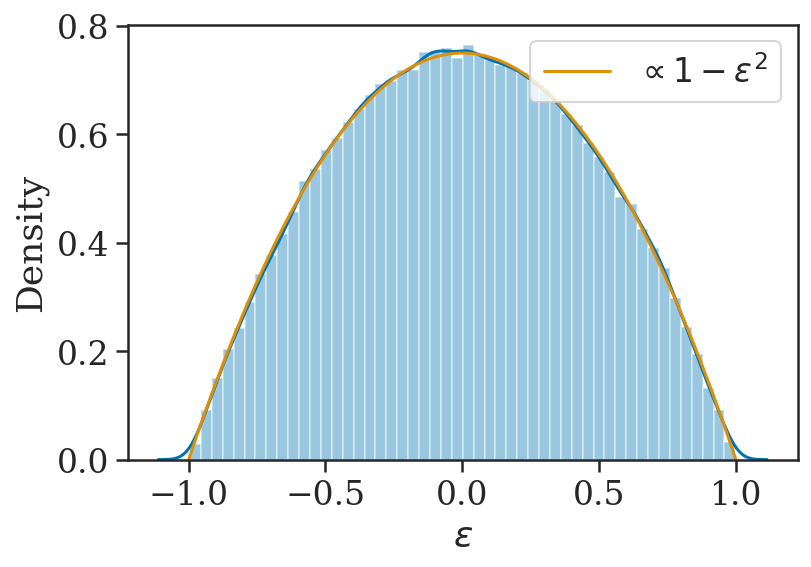

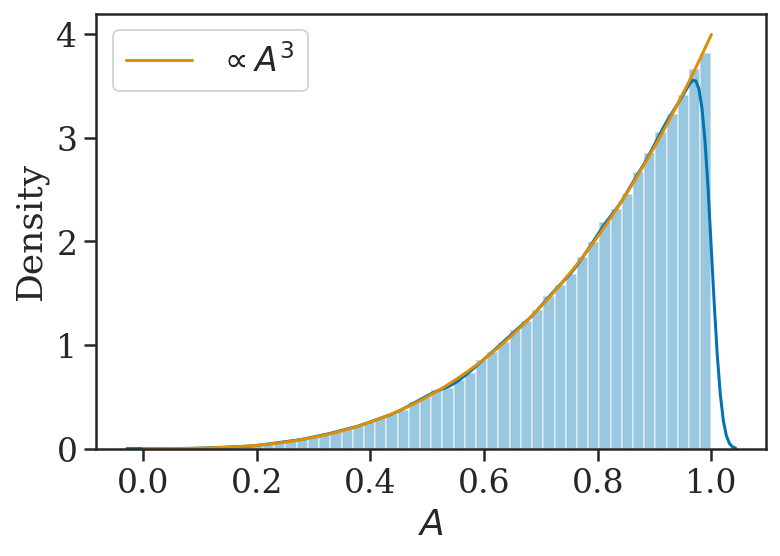

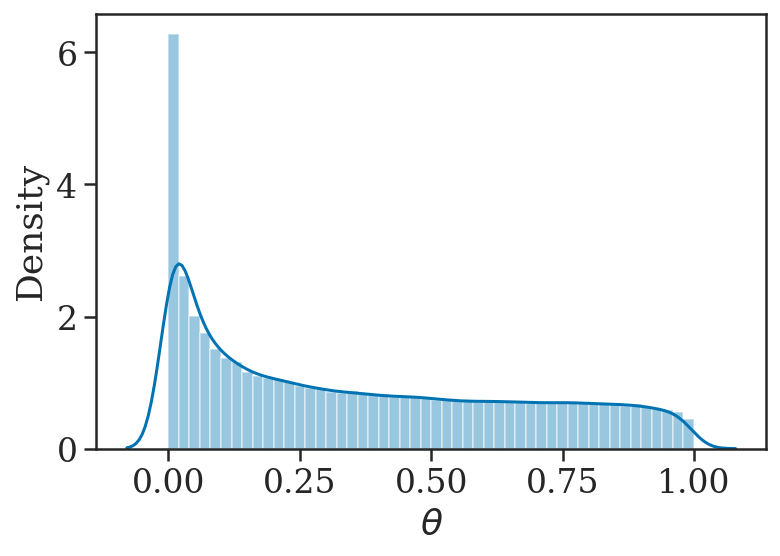

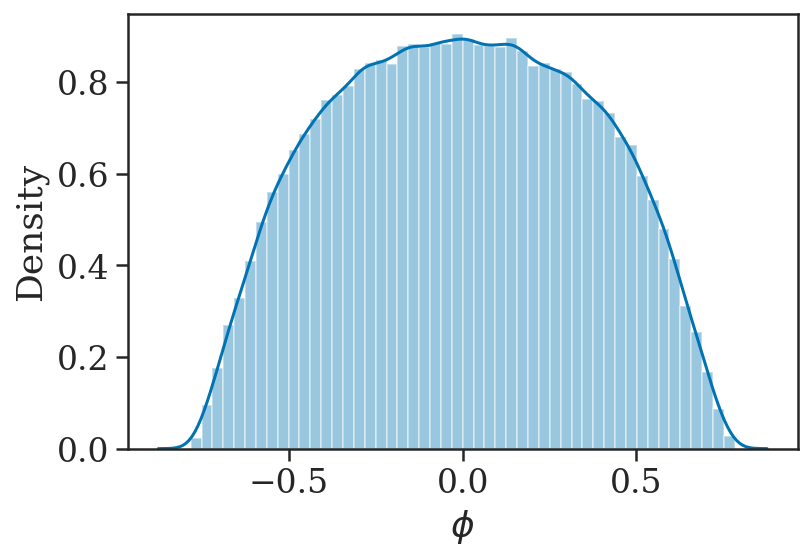

In [4]:
N = 500000
Apx = Ap_x = random.uniform(-1, 1, N)
Apy = Ap_y = random.uniform(-1, 1, N)
Acx = Ac_x = random.uniform(-1, 1, N)
Acy = Ac_y = random.uniform(-1, 1, N)

# r = linalg.norm([Apx, Apy, Acy, Acy], axis=0)

A = 0.5*(sqrt((Ac_y + Ap_x)**2 + (Ac_x - Ap_y)**2) + sqrt((Ac_y - Ap_x)**2 + (Ac_x + Ap_y)**2))
e = (sqrt((Ac_y + Ap_x)**2 + (Ac_x - Ap_y)**2) -  sqrt((Ac_y - Ap_x)**2 + (Ac_x + Ap_y)**2))/(sqrt((Ac_y + Ap_x)**2 + (Ac_x - Ap_y)**2) +  sqrt((Ac_y - Ap_x)**2 + (Ac_x + Ap_y)**2))
theta = (-arctan(-Ac_x - Ap_y, -Ac_y + Ap_x) -  arctan(-Ac_x + Ap_y, Ac_y + Ap_x))/2.
phi = (-arctan(-Ac_x - Ap_y, -Ac_y + Ap_x) + arctan(-Ac_x + Ap_y, Ac_y + Ap_x))/2.

Amax = 1

sns.distplot(e[A < Amax])

es = linspace(-0.999, 0.999, 100)
plot(es, jac_e(es), label=r'$\propto 1-\epsilon^2$')
legend();
xlabel(r'$\epsilon$');
figure()

sns.distplot(A[A < Amax])
As = linspace(0, Amax, 50)
plot(As, jac_A(As), label=r'$\propto A^3$')
xlabel(r'$A$');
legend();
figure()

sns.distplot(sin(2*theta[A < Amax])**2)
xlabel(r'$\theta$');
figure()

sns.distplot(phi[A < Amax])
xlabel(r'$\phi$');

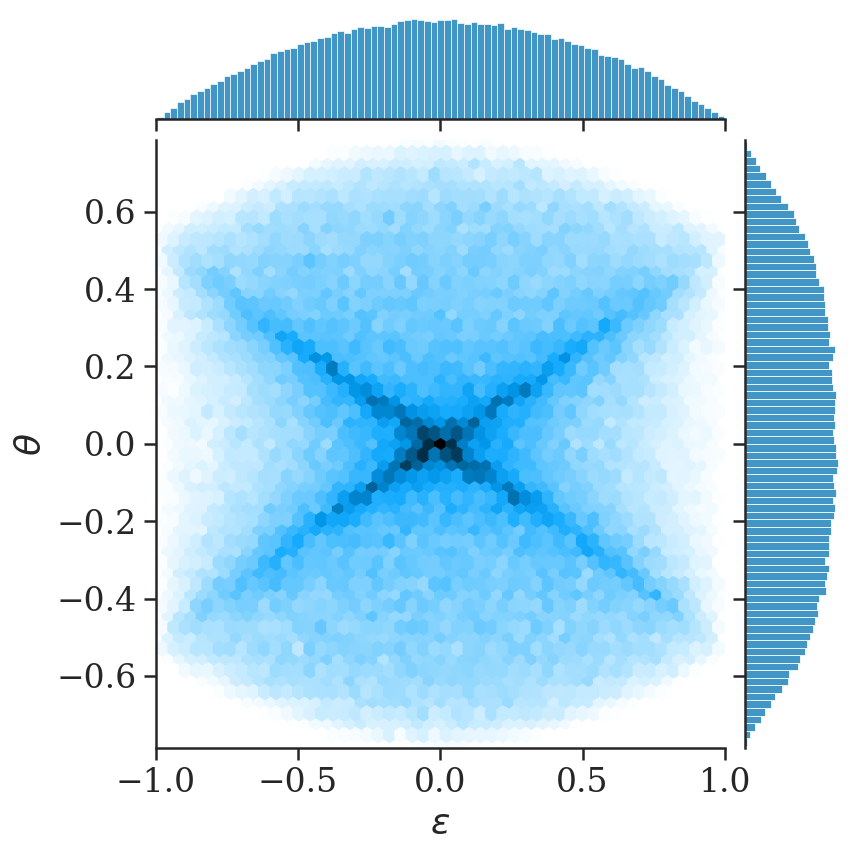

In [5]:
g = sns.jointplot(e[A < Amax], theta[A < Amax], kind='hex',
                  xlim=(-1,1), ylim=(-pi/4,pi/4))
g.ax_joint.set_xlabel(r'$\epsilon$');
g.ax_joint.set_ylabel(r'$\theta$');

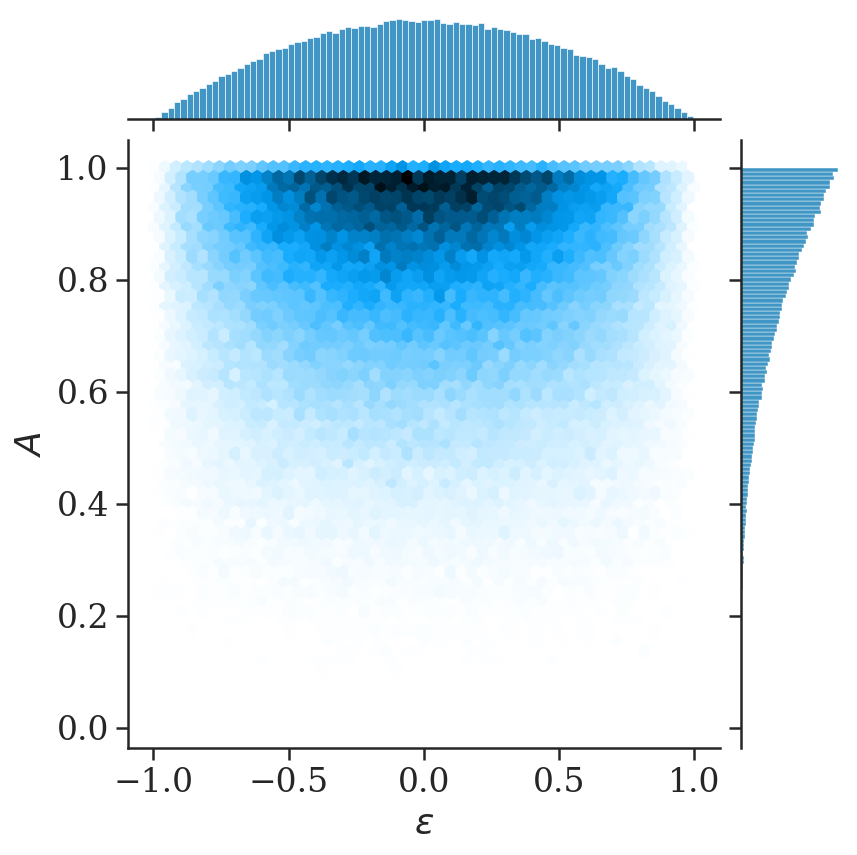

In [6]:
g = sns.jointplot(e[A < Amax], A[A < Amax], kind='hex')
g.ax_joint.set_xlabel(r'$\epsilon$');
g.ax_joint.set_ylabel(r'$A$');

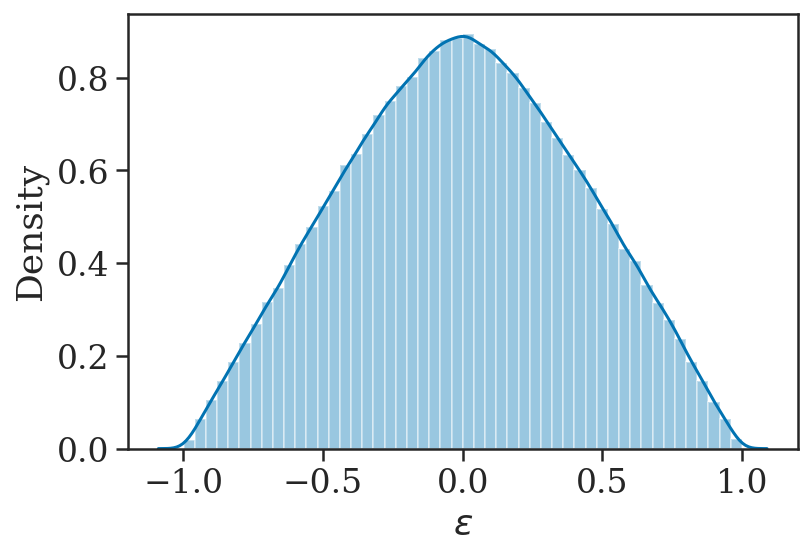

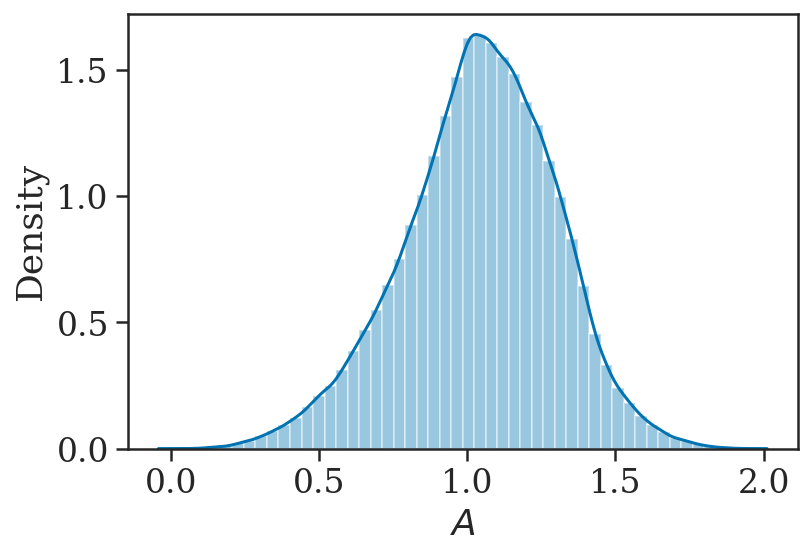

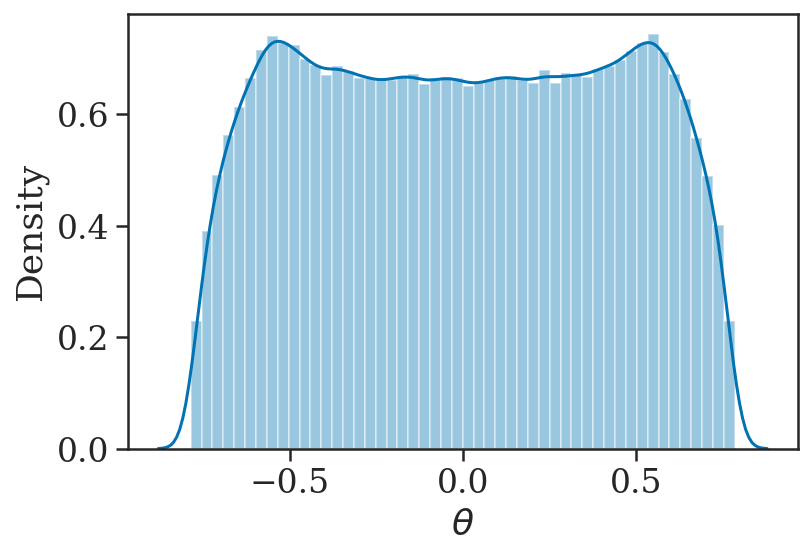

In [7]:
sns.distplot(e)
xlabel(r'$\epsilon$');
figure()

sns.distplot(A)
xlabel(r'$A$');
figure()

sns.distplot(theta)
xlabel(r'$\theta$');

<AxesSubplot:ylabel='Density'>

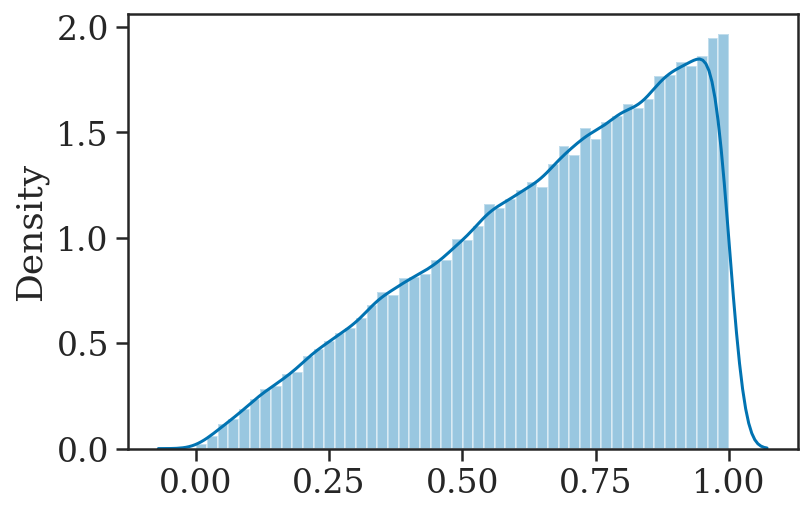

In [8]:
N = 500000
x = random.uniform(-2, 2, N)
y = random.uniform(-2, 2, N)
r = sqrt(x**2 + y**2)

rs = linspace(0, 0.999, 1000)
sns.distplot(r[r<1])

In [9]:
J = 2/(sqrt((Acy + Apx)**2 + (Acx - Apy)**2) * sqrt((Acy - Apx)**2 + (Acx + Apy)**2)* (sqrt((Acy + Apx)**2 + (Acx - Apy)**2) + sqrt((Acy - Apx)**2 + (Acx + Apy)**2)))

## Linear polarizations

In [10]:
# Sqrt((1 + \[Epsilon]**2)**2/(-1 + \[Epsilon]**2)**2 - Cos(2*\[Theta])**2)/(2.*A)

def jac_e_ApAc(e, cos2th2=0):
    j = 1/sqrt((1 + e**2)**2/(-1 + e**2)**2 - cos2th2)
    return j / trapz(j, e)

def jac_A_ApAc(A):
    j = (2.*A)
    return j / trapz(j, A)

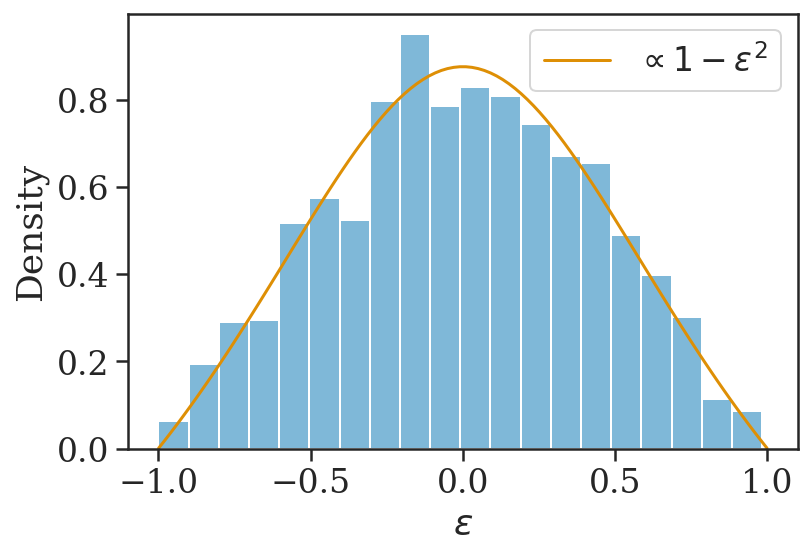

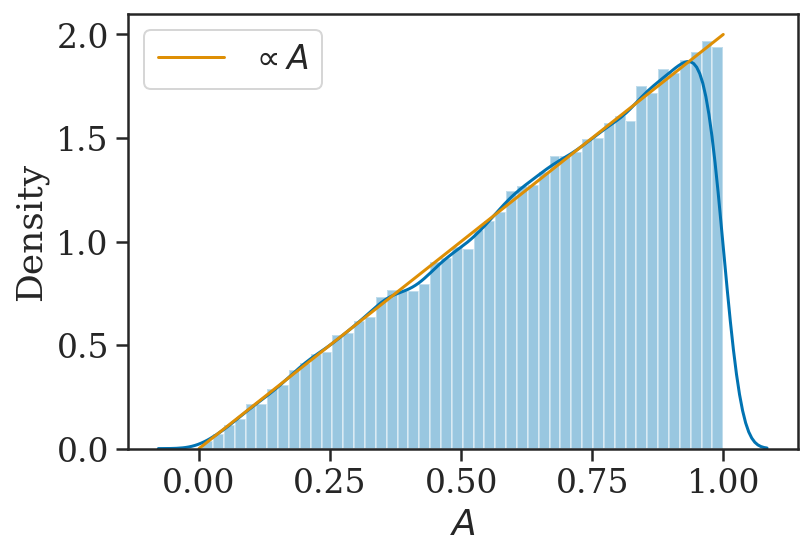

In [49]:
N = 50000
Ap = random.uniform(0, 1, N)
Ac = random.uniform(0, 1, N)
phip = random.uniform(0, 2*pi, N)
phic = random.uniform(0, 2*pi, N)

A = (sqrt(Ac**2 + Ap**2 - 2*Ac*Ap*sin(phic - phip)) + sqrt(Ac**2 + Ap**2 + 2*Ac*Ap*sin(phic - phip)))/2.

e = (1/sin(phic - phip))*(Ac**2 + Ap**2 - sqrt(Ac**2 + Ap**2 - 2*Ac*Ap*sin(phic - phip))*sqrt(Ac**2 + Ap**2 + 2*Ac*Ap*sin(phic - phip)))/(2.*Ac*Ap)
cos2th2 = (-Ac**2 + Ap**2)**2/(Ac**4 + Ap**4 + 2*Ac**2*Ap**2*cos(2*phic - 2*phip))

sns.histplot(e[(A<1) & (cos2th2 < 0.01)], stat='density', alpha=0.5)
plot([],[])
es = linspace(-0.999, 0.999, 100)
plot(es, jac_e_ApAc(es), label=r'$\propto 1-\epsilon^2$')
legend();
xlabel(r'$\epsilon$')
figure();

Amax = 1

sns.distplot(A[A<1])
As = linspace(0, Amax, 50)
plot(As, jac_A_ApAc(As, ), label=r'$\propto A$')
xlabel(r'$A$');
legend();

Text(0.5, 0, '$2\\theta$')

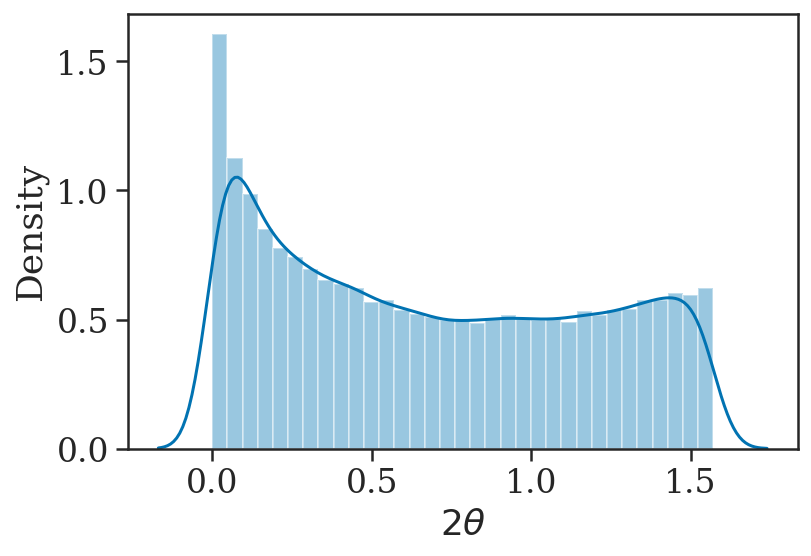

In [12]:
sns.distplot(arccos(sqrt(cos2th2)))
xlabel(r'$2\theta$')

Text(0.5, 0, '$\\cos 2\\theta$')

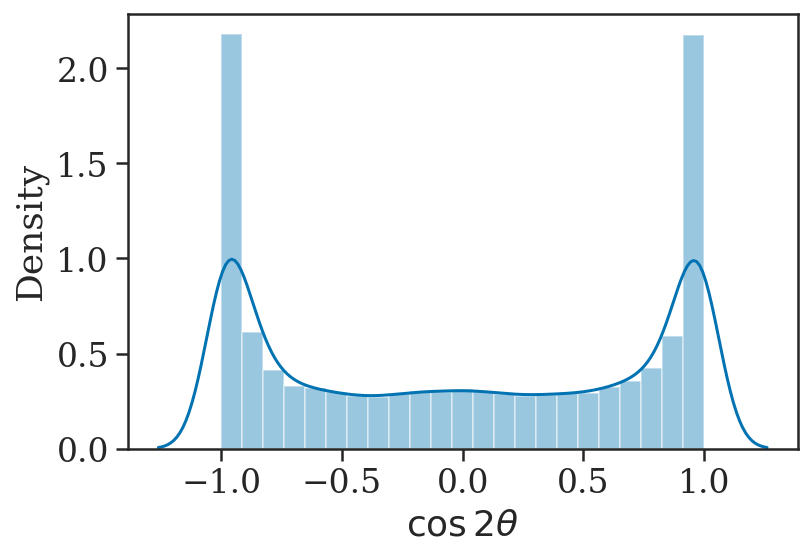

In [13]:
cos2th = (-Ac**2 + Ap**2)/sqrt(Ac**4 + Ap**4 + 2*Ac**2*Ap**2*cos(2*phic - 2*phip))
sns.distplot(cos2th)
xlabel(r'$\cos 2\theta$')

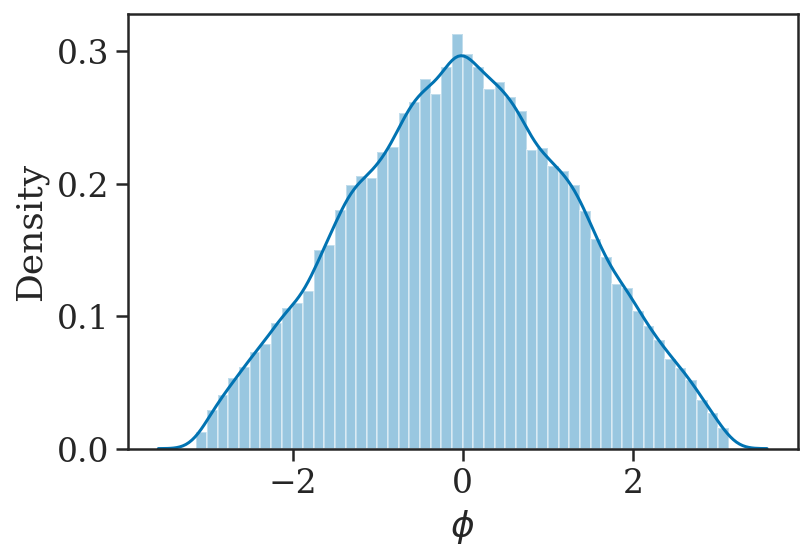

In [14]:
phi = (-arctan2(-Ac*cos(phic) - Ap*sin(phip), Ap*cos(phip) - Ac*sin(phic)) + arctan2(-(Ac*cos(phic)) + Ap*sin(phip), Ap*cos(phip) + Ac*sin(phic)))/2.

sns.distplot(phi)
xlabel(r'$\phi$');

/var/folders/w6/_4dty3r148b5hwmmgykz3_d00001sb/T/ipykernel_36953/729959301.py:4: RuntimeWarning: divide by zero encountered in true_divide
  j = 1/ (-(1 + cosi**2)**2/(2*(-1 + cosi**2)))


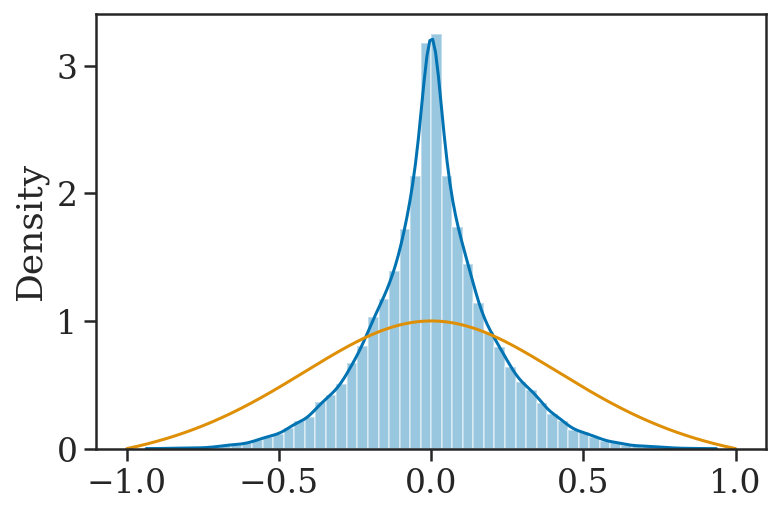

In [15]:
cosi = (-1 + sqrt(1 - e**2))/e

def jac_cosi(cosi):
    j = 1/ (-(1 + cosi**2)**2/(2*(-1 + cosi**2)))
    return j/ trapz(j, cosi)

cis = linspace(-1, 1, 1000)
sns.distplot(cosi[A<Amax])
plot(cis, jac_cosi(cis))

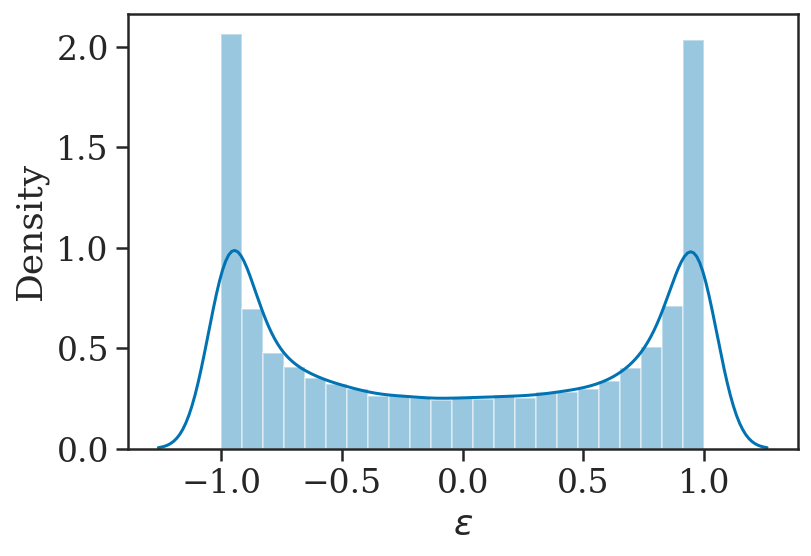

In [16]:
cosi = random.uniform(-1, 1, N)
sns.distplot(2*cosi/(1+ cosi**2))
xlabel(r'$\epsilon$');

## Circular polarizations

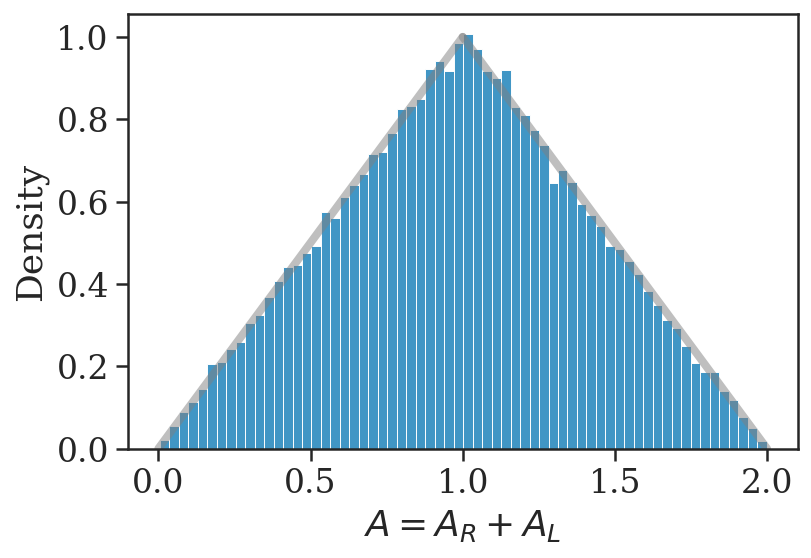

In [38]:
cL = random.uniform(0, 1, 50000)
cR = random.uniform(0, 1, 50000)
a = cL + cR

sns.histplot(a, stat='density')
x = linspace(0, 1, 100)
plot(x, x, lw=4, c='gray', alpha=0.5)
plot(x+1, 1-x, lw=4, c='gray', alpha=0.5)

xlabel(r'$A = A_R + A_L$');
savefig('jac_Aellip_RL.pdf', bbox_inches='tight')